In [114]:
import numpy as np
import xarray as xr
from main import paths, idx_1d, LAT_DEG, lx
import gsw
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
# Path to save figures, save data and OFAM model output.
fpath, dpath, xpath = paths()
xpath

PosixPath('/g/data/e14/as3189/OFAM/trop_pac')

In [123]:
du = xr.open_dataset(xpath.joinpath('ocean_u_1981_01.nc'))
ds = xr.open_dataset(xpath.joinpath('ocean_salt_1981_01.nc'))
dt = xr.open_dataset(xpath.joinpath('ocean_temp_1981_01.nc'))
du

<xarray.Dataset>
Dimensions:         (Time: 31, nv: 2, st_edges_ocean: 52, st_ocean: 51, xu_ocean: 1750, yu_ocean: 300)
Coordinates:
  * Time            (Time) object 1981-01-01 12:00:00 ... 1981-01-31 12:00:00
  * nv              (nv) float64 1.0 2.0
  * st_edges_ocean  (st_edges_ocean) float64 0.0 5.0 10.0 ... 4.056e+03 5e+03
  * st_ocean        (st_ocean) float64 2.5 7.5 12.5 ... 3.603e+03 4.509e+03
  * xu_ocean        (xu_ocean) float64 120.0 120.1 120.2 ... 294.7 294.8 294.9
  * yu_ocean        (yu_ocean) float64 -15.0 -14.9 -14.8 ... 14.7 14.8 14.9
Data variables:
    Time_bounds     (Time, nv) timedelta64[ns] ...
    average_DT      (Time) timedelta64[ns] ...
    average_T1      (Time) datetime64[ns] ...
    average_T2      (Time) datetime64[ns] ...
    u               (Time, st_ocean, yu_ocean, xu_ocean) float32 ...
Attributes:
    filename:       TMP/ocean_ofam_1981_01.nc.0000
    NumFilesInSet:  720
    title:          jra_55_1979
    grid_type:      regular
    history:     

In [144]:
z = -du.st_ocean.values
y = du.yu_ocean.values
Y, Z = np.meshgrid(y, z)

In [145]:
# Convert depth to pressure [dbar].
p = gsw.conversions.p_from_z(Z, Y)
p[:, 0]

array([   2.51471032,    7.54422309,   12.57385871,   17.61909935,
         22.80151953,   28.33690889,   34.42201559,   41.19982844,
         48.74556048,   57.05929599,   66.06597672,   75.62273118,
         85.53285935,   95.58057361,  105.64426392,  115.70844483,
        125.77311627,  135.83827815,  145.90393039,  155.97007292,
        166.03670565,  176.10382849,  186.17144138,  196.23954423,
        206.49933987,  218.44596219,  234.69848712,  257.5489827 ,
        288.49519515,  328.06025489,  375.72949908,  430.01178895,
        488.61877364,  549.4466658 ,  614.91619339,  691.11040807,
        781.96077391,  887.48622324, 1003.78465692, 1124.90708488,
       1249.37554606, 1380.76454947, 1522.13603826, 1674.59870757,
       1837.08558585, 2006.562387  , 2189.2893702 , 2459.71948923,
       2932.12075067, 3655.54542532, 4584.39928927])

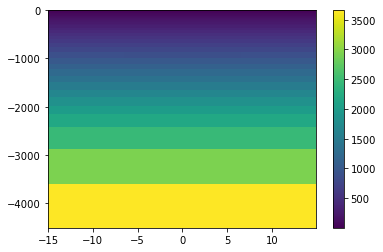

In [146]:
fig, ax = plt.subplots()
cmap = ax.pcolormesh(Y, Z, p)
fig.colorbar(cmap)

In [ ]:
"""
gsw.pot_rho_t_exact(SA, t, p, p_ref)
Calculates potential density of seawater.

Parameters

    SAarray-like

        Absolute Salinity, g/kg
    tarray-like

        In-situ temperature (ITS-90), degrees C
    parray-like

        Sea pressure (absolute pressure minus 10.1325 dbar), dbar
    p_refarray-like

        Reference pressure, dbar

Returns

    pot_rho_t_exactarray-like, kg/m^3

        potential density (not potential density anomaly)


"""

In [147]:
lon = 180
SA = ds.salt.sel(xt_ocean=lon + 0.05, method='nearest').isel(Time=0)
t = dt.temp.sel(xt_ocean=lon + 0.05, method='nearest').isel(Time=0)
p_ref = 0
print(np.shape(SA))

(51, 300)


In [148]:
rho = gsw.pot_rho_t_exact(SA, t, p, p_ref)
rho
np.shape(rho)

(51, 300)

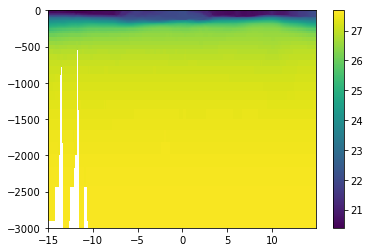

In [155]:
fig, ax = plt.subplots()
cmap = ax.pcolormesh(Y, Z, rho-1000)
ax.set_ylim(-3000, 0)
fig.colorbar(cmap)

In [ ]:
"""
gsw.CT_from_t(SA, t, p)[source]

    Calculates Conservative Temperature of seawater from in-situ temperature.

    Parameters

        SAarray-like

            Absolute Salinity, g/kg
        tarray-like

            In-situ temperature (ITS-90), degrees C
        parray-like

            Sea pressure (absolute pressure minus 10.1325 dbar), dbar

    Returns

        CTarray-like, deg C

            Conservative Temperature (ITS-90)
            

gsw.rho(SA, CT, p)[source]

    Calculates in-situ density from Absolute Salinity and Conservative Temperature, using the computationally-efficient expression for specific volume in terms of SA, CT and p (Roquet et al., 2015).

    Parameters

        SAarray-like

            Absolute Salinity, g/kg
        CTarray-like

            Conservative Temperature (ITS-90), degrees C
        parray-like

            Sea pressure (absolute pressure minus 10.1325 dbar), dbar

    Returns

        rhoarray-like, kg/m

            in-situ density


"""